In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
import pmdarima
from pmdarima import auto_arima
from composition_stats import closure
from composition_stats import ilr,ilr_inv
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os 
  
# current directory 
current_dir = os.getcwd() 
relative_path=os.path.abspath(os.path.join(current_dir, os.pardir))

In [2]:
SLR_data = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\SLR_data.csv"))
SLR_data['Year'] = pd.to_datetime(SLR_data['Year'])
SLR_data =SLR_data.set_index("Year")

In [3]:
test_data= pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\df_test.csv"))
test_data['Year'] = pd.to_datetime(test_data['Year'])
test_data = test_data.set_index("Year")

In [4]:
SLR_e=SLR_data['log_ratio_e']
SLR_y=SLR_data['log_ratio_y']
SLR_k=SLR_data['log_ratio_k']

In [5]:
def find_best_pdq(train_data, test_data, d):
    df_search = pd.DataFrame()
    for p in range(6):
            for q in range(6):
                arima_model = ARIMA(train_data, order=(p, d, q)).fit()
                # predict from the position of test data which is length of train data
                prediction = arima_model.predict(
                    start=len(train_data), end=len(train_data)+len(test_data)-1)
                rmse = sqrt(mean_squared_error(test_data, prediction))
                df_search = df_search.append({'pdq_paramters': str(
                    p)+" "+str(d)+" "+str(q), 'rmse': rmse}, ignore_index=True)
    return df_search, test_data, prediction

For SLR_e

In [6]:
train_e_1, test_e_1 = train_test_split(SLR_e, test_size=0.2, shuffle=False)
train_e_2, test_e_2 = train_test_split(train_e_1, test_size=0.2, shuffle=False)
train_e_3, test_e_3 = train_test_split(train_e_2, test_size=0.15, shuffle=False)
log_ratio_e_best_pdq1, test_data_e_1, prediction_test_e_1=find_best_pdq(train_e_1, test_e_1, 2)
log_ratio_e_best_pdq2, test_data_e_2, prediction_test_e_2=find_best_pdq(train_e_2, test_e_2, 2)
log_ratio_e_best_pdq3, test_data_e_3, prediction_test_e_3=find_best_pdq(train_e_3, test_e_3, 2)

concatenated_1 = pd.concat([log_ratio_e_best_pdq1, log_ratio_e_best_pdq2, log_ratio_e_best_pdq3])
concatenated_1=concatenated_1.groupby('pdq_paramters').mean()
concatenated_1.sort_values('rmse', ascending=True).head()

,rmse
pdq_paramters,
3 2 2,0.008676
5 2 4,0.016092
3 2 5,0.016603
4 2 4,0.017709
2 2 5,0.017910


In [7]:
arima_model_e = ARIMA(SLR_e, order=(3, 2, 2)).fit()
prediction_e = arima_model_e.predict(
    start=len(SLR_e), end=len(SLR_e)+len(test_data)-1)
prediction_e = prediction_e.to_frame()
prediction_e.rename(columns = {'predicted_mean':0}, inplace = True)
final_e = pd.concat([SLR_e, prediction_e])

For SLR_y

In [8]:
train_y_1, test_y_1 = train_test_split(SLR_y, test_size=0.2, shuffle=False)
train_y_2, test_y_2 = train_test_split(train_y_1, test_size=0.2, shuffle=False)
train_y_3, test_y_3 = train_test_split(train_y_2, test_size=0.15, shuffle=False)
log_ratio_y_best_pdq1, test_data_y_1, prediction_test_y_1=find_best_pdq(train_y_1, test_y_1, 1)
log_ratio_y_best_pdq2, test_data_y_2, prediction_test_y_2=find_best_pdq(train_y_2, test_y_2, 1)
log_ratio_y_best_pdq3, test_data_y_3, prediction_test_y_3=find_best_pdq(train_y_3, test_y_3, 1)

concatenated_1 = pd.concat([log_ratio_y_best_pdq1, log_ratio_y_best_pdq2, log_ratio_y_best_pdq3])
concatenated_1=concatenated_1.groupby('pdq_paramters').mean()
concatenated_1.sort_values('rmse', ascending=True).head()

,rmse
pdq_paramters,
4 1 3,0.004571
1 1 0,0.005069
2 1 0,0.005362
2 1 1,0.005573
3 1 2,0.005734


In [9]:
arima_model_y = ARIMA(SLR_y, order=(4, 1, 3)).fit()
prediction_y = arima_model_y.predict(
    start=len(SLR_y), end=len(SLR_y)+len(test_data)-1)
prediction_y = prediction_y.to_frame()
prediction_y.rename(columns = {'predicted_mean':0}, inplace = True)
final_y = pd.concat([SLR_y, prediction_y])

For SLR_k


In [10]:
train_k_1, test_k_1 = train_test_split(SLR_k, test_size=0.2, shuffle=False)
train_k_2, test_k_2 = train_test_split(train_k_1, test_size=0.2, shuffle=False)
train_k_3, test_k_3 = train_test_split(train_k_2, test_size=0.15, shuffle=False)
log_ratio_k_best_pdq1, test_data_k_1, prediction_test_k_1=find_best_pdq(train_k_1, test_k_1, 1)
log_ratio_k_best_pdq2, test_data_k_2, prediction_test_k_2=find_best_pdq(train_k_2, test_k_2, 1)
log_ratio_k_best_pdq3, test_data_k_3, prediction_test_k_3=find_best_pdq(train_k_3, test_k_3, 1)

concatenated_1 = pd.concat([log_ratio_k_best_pdq1, log_ratio_k_best_pdq2, log_ratio_k_best_pdq3])
concatenated_1=concatenated_1.groupby('pdq_paramters').mean()
concatenated_1.sort_values('rmse', ascending=True).head()

,rmse
pdq_paramters,
2 1 2,0.006997
2 1 5,0.007439
2 1 0,0.007869
3 1 2,0.008111
3 1 1,0.008385


In [11]:
arima_model_k = ARIMA(SLR_k, order=(2, 1, 2)).fit()
prediction_k = arima_model_k.predict(
    start=len(SLR_k), end=len(SLR_k)+len(test_data)-1)
prediction_k = prediction_k.to_frame()
prediction_k.rename(columns = {'predicted_mean':0}, inplace = True)
final_k = pd.concat([SLR_k, prediction_k])

Combine parts

In [12]:
final_e.rename(columns = {0:'log_ratio_e'}, inplace = True)
final_y.rename(columns = {0:'log_ratio_y'}, inplace = True)
final_k.rename(columns = {0:'log_ratio_k'}, inplace = True)

In [13]:
def SLR_inv(df1,df2,df3):
    arr_e = df1.to_numpy()
    arr_y = df2.to_numpy()
    arr_k = df3.to_numpy()
    e_log_ratio = pd.DataFrame(arr_e,columns=['e_log_ratio'])
    y_log_ratio = pd.DataFrame(arr_y,columns=['y_log_ratio'])
    k_log_ratio = pd.DataFrame(arr_k,columns=['y_log_ratio'])
    e2_arr=[]
    y2_arr=[]
    k2_arr=[]
    for i in range(len(df1)):
        A = e_log_ratio._get_value(i,0,takeable = True)
        B = y_log_ratio._get_value(i,0,takeable = True)
        C = k_log_ratio._get_value(i,0,takeable = True)
        e2_arr.append(1)
        y2_arr.append(((1/10**A)+1)/((1/10**B)+1))
        k2_arr.append(((1/10**A)+1)/((1/10**C)+1))
    e_prepro = pd.DataFrame(e2_arr, columns=['e_prepro'])
    y_prepro = pd.DataFrame(y2_arr, columns=['y_prepro'])
    k_prepro = pd.DataFrame(k2_arr, columns=['k_prepro'])
    prepro = pd.concat([e_prepro, y_prepro,k_prepro],axis=1)
    data_proportion = closure(prepro)
    return data_proportion

In [14]:
data_proportion=SLR_inv(final_e,final_y,final_k)

In [15]:
def set_col(df):
    df = pd.DataFrame(df, columns=[
    'elder', 'youth', 'kid'])
    df['Year'] = df.index + 1964
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df = df.set_index("Year")
    return df

In [16]:
proportion = set_col(data_proportion)

In [17]:
df_actual=proportion[(proportion.index< '2010-01-01')]
df_forecast=proportion[(proportion.index> '2009-01-01')]

In [18]:
proportion_actual_1=SLR_inv(test_data_e_1, test_data_y_1,  test_data_k_1)
proportion_actual_2=SLR_inv(test_data_e_2, test_data_y_2, test_data_k_2)
proportion_actual_3=SLR_inv(test_data_e_3, test_data_y_3, test_data_k_3)
proportion_forecast_1=SLR_inv(prediction_test_e_1, prediction_test_y_1, prediction_test_k_1)
proportion_forecast_2=SLR_inv(prediction_test_e_2, prediction_test_y_2,prediction_test_k_2)
proportion_forecast_3=SLR_inv(prediction_test_e_3, prediction_test_y_3,prediction_test_k_3)

In [19]:
rmse1 = sqrt(mean_squared_error(proportion_actual_1, proportion_forecast_1))
rmse2 = sqrt(mean_squared_error(proportion_actual_2, proportion_forecast_2))
rmse3 = sqrt(mean_squared_error(proportion_actual_3, proportion_forecast_3))

rmse_cv=(rmse1+rmse2+rmse3)/3
rmse_cv

0.004537068689542495

In [20]:
rmse_final = sqrt(mean_squared_error(df_forecast, test_data))
rmse_final

0.00795361558270633

In [21]:
df_forecast.to_csv(relative_path+"\\age_structure_data\\grid_SLR_forecast.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

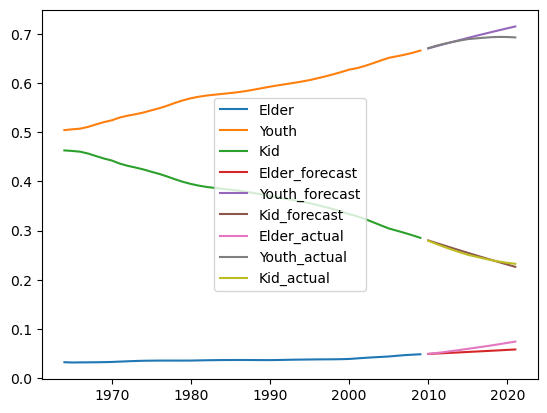

In [22]:
plt.plot(df_actual['elder'],label="Elder")
plt.plot(df_actual['youth'],label="Youth")
plt.plot(df_actual['kid'],label="Kid")
plt.plot(df_forecast['elder'],label="Elder_forecast")
plt.plot(df_forecast['youth'],label="Youth_forecast")
plt.plot(df_forecast['kid'],label="Kid_forecast")

plt.plot(test_data['elder'],label="Elder_actual")
plt.plot(test_data['youth'],label="Youth_actual")
plt.plot(test_data['kid'],label="Kid_actual")


plt.legend(loc='best')
plt.show